In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import bamboolib
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import norm

In [91]:
data = pd.read_excel('Frecuencias.xlsx')
print(data.columns)
print(data.shape)

Index(['Tienda', 'Cliente4 Dsc Nestle', 'Formato', 'Ventas'], dtype='object')
(1298, 4)


In [92]:
df_q1 = data.query('Ventas < Ventas.quantile(.25)')
df_q2 = data.query('Ventas > Ventas.quantile(.25) & Ventas < Ventas.quantile(.50)')
df_q3 = data.query('Ventas > Ventas.quantile(.50) & Ventas < Ventas.quantile(.75)')
df_q4 = data.query('Ventas > Ventas.quantile(.75)')

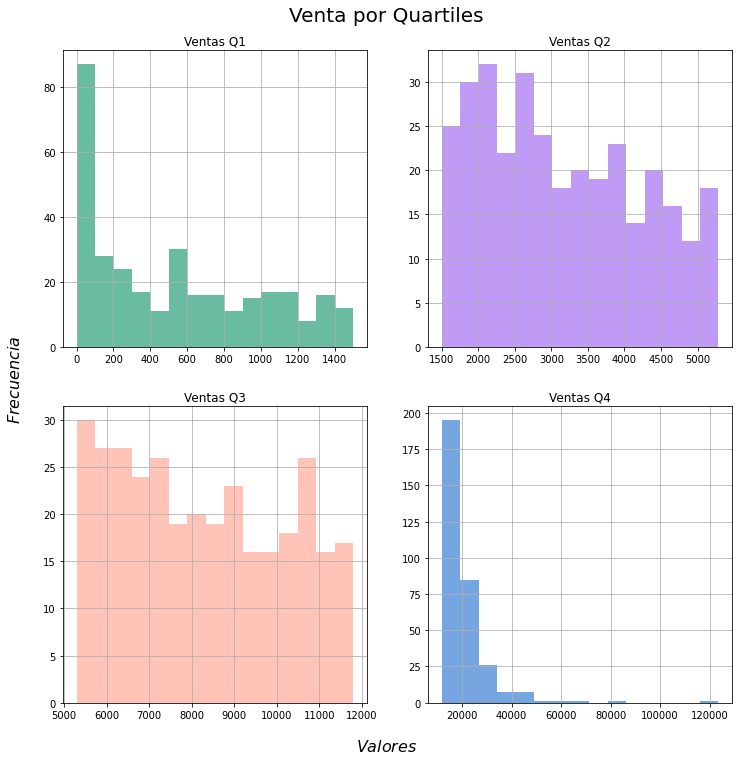

In [121]:
# Parámetros estéticos de seaborn
sns.set_palette("dark", desat = 1)
sns.set_context(rc={"figure.figsize": (16, 16)})

fig = plt.figure(figsize=(12,12))

fig.add_subplot(2, 2, 1)
plt.title('Suma de Venta_Q1');
plt.hist(df_q1['Ventas'], bins = 15, density= False, color = '#43aa8b', alpha = 0.8);
plt.grid(True);
plt.title('Ventas Q1');

fig.add_subplot(2, 2, 2)
plt.title('Suma de Venta_Q2');
plt.hist(df_q2['Ventas'], bins = 15, density= False, color = '#8338ec', alpha = 0.5);
plt.grid(True);
plt.title('Ventas Q2');

fig.add_subplot(2, 2, 3)
plt.title('Suma de Venta_Q3');
plt.hist(df_q3['Ventas'], bins = 15, density= False, color = '#ffb5a7', alpha = 0.8);
plt.grid(True);
plt.title('Ventas Q3');

fig.add_subplot(2, 2, 4)
plt.title('Suma de Venta_Q4');
plt.hist(df_q4['Ventas'], bins = 15, density= False, color = '#5390d9', alpha = 0.8);
plt.grid(True);
plt.title('Ventas Q4');

angle = 90

fig.text(0.5,0.92, r'Venta por Quartiles',ha='center',va='center',fontsize='20')
fig.text(0.07,0.5, r'$Frecuencia$',ha='center',va='center',fontsize='16',rotation=angle, rotation_mode='anchor')
fig.text(0.5,0.075, r'$Valores$',ha='center',va='center',fontsize='16')

plt.savefig("Histogramas.jpg")

In [97]:
print(data['Cliente4 Dsc Nestle'].unique())

['MX4 CALIMAX' 'L4 MX LA COMER' 'MX4 CHEDRAUI' 'MX L4 FUTURAMA' 'MX4 HEB'
 'MX4 LEY SUPERMERCADOS' 'MX4 SORIANA' 'Supercenter' 'Superama']


In [98]:
x_WM = data[data["Cliente4 Dsc Nestle"]=='MX4 CALIMAX']
x_CM = data[data["Cliente4 Dsc Nestle"]=='L4 MX LA COMER']
x_CH  = data[data["Cliente4 Dsc Nestle"]=='MX4 CHEDRAUI']
x_FT = data[data["Cliente4 Dsc Nestle"]=='MX L4 FUTURAMA']
x_HB = data[data["Cliente4 Dsc Nestle"]=='MX4 HEB']
x_LEY  = data[data["Cliente4 Dsc Nestle"]=='MX4 LEY SUPERMERCADOS']
x_SO = data[data["Cliente4 Dsc Nestle"]=='MX4 SORIANA']
x_SU = data[data["Cliente4 Dsc Nestle"]=='Supercenter']
x_SA  = data[data["Cliente4 Dsc Nestle"]=='Superama']

In [101]:
dist_WM_4 = norm(loc = np.mean(x_WM["Ventas"]), scale = np.std(x_WM["Ventas"]))
dist_CM_4 = norm(loc = np.mean(x_CM["Ventas"]), scale = np.std(x_CM["Ventas"]))
dist_CH_4 = norm(loc = np.mean(x_CH["Ventas"]), scale = np.std(x_CH["Ventas"]))
dist_FT_4 = norm(loc = np.mean(x_FT["Ventas"]), scale = np.std(x_FT["Ventas"]))
dist_HB_4 = norm(loc = np.mean(x_HB["Ventas"]), scale = np.std(x_HB["Ventas"]))
dist_LEY_4 = norm(loc = np.mean(x_LEY["Ventas"]), scale = np.std(x_LEY["Ventas"]))
dist_SO_4 = norm(loc = np.mean(x_SO["Ventas"]), scale = np.std(x_SO["Ventas"]))
dist_SU_4 = norm(loc = np.mean(x_SU["Ventas"]), scale = np.std(x_SU["Ventas"]))
dist_SA_4 = norm(loc = np.mean(x_SA["Ventas"]), scale = np.std(x_SA["Ventas"]))

In [103]:
x_WM = np.linspace(dist_WM_4.ppf(0.001),
                dist_WM_4.ppf(0.999), 100)
x_CM = np.linspace(dist_CM_4.ppf(0.001),
                dist_CM_4.ppf(0.999), 100)
x_CH = np.linspace(dist_CH_4.ppf(0.001),
                dist_CH_4.ppf(0.999), 100)
x_FT = np.linspace(dist_FT_4.ppf(0.001),
                dist_FT_4.ppf(0.999), 100)
x_HB = np.linspace(dist_HB_4.ppf(0.001),
                dist_HB_4.ppf(0.999), 100)
x_LEY = np.linspace(dist_LEY_4.ppf(0.001),
                dist_LEY_4.ppf(0.999), 100)
x_SO= np.linspace(dist_SO_4.ppf(0.001),
                dist_SO_4.ppf(0.999), 100)
x_SU= np.linspace(dist_SU_4.ppf(0.001),
                dist_SU_4.ppf(0.999), 100)
x_SA= np.linspace(dist_SA_4.ppf(0.001),
                dist_SA_4.ppf(0.999), 100)

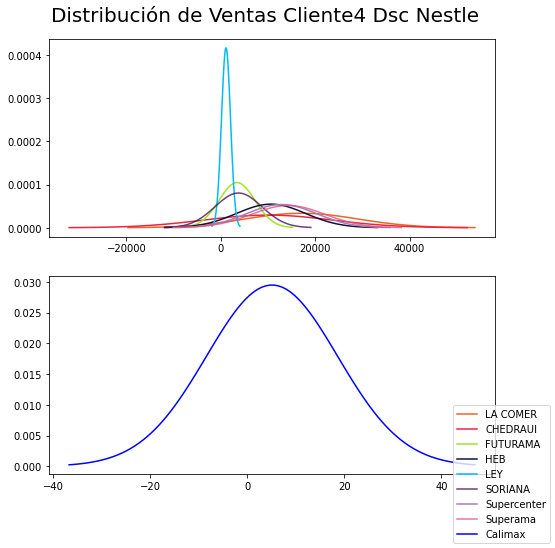

In [145]:
fig = plt.figure(figsize=(8,8))

fig.add_subplot(2, 1, 1)
plt.plot(x_CM, dist_CM_4.pdf(x_CM), "#eb6424", label="LA COMER")
plt.plot(x_CH, dist_CH_4.pdf(x_CH), "#ef233c", label="CHEDRAUI")
plt.plot(x_FT, dist_FT_4.pdf(x_FT), "#a0e426", label="FUTURAMA")
plt.plot(x_HB, dist_HB_4.pdf(x_HB), "#0e103d", label="HEB")
plt.plot(x_LEY, dist_LEY_4.pdf(x_LEY), "#00bbf9", label="LEY")
plt.plot(x_SO, dist_SO_4.pdf(x_SO), "#431259", label="SORIANA", alpha = 0.8)
plt.plot(x_SU, dist_SU_4.pdf(x_SU), "#a37eba", label="Supercenter")
plt.plot(x_SA, dist_SA_4.pdf(x_SA), "#e05780", label="Superama", alpha = 0.8)

fig.add_subplot(2, 1, 2)
plt.plot(x_WM, dist_WM_4.pdf(x_WM), "b", label="Calimax");

angle = 90

fig.text(0.5,0.92, r'Distribución de Ventas Cliente4 Dsc Nestle',ha='center',va='center',fontsize='20')

fig.legend(loc = 'lower right')
plt.savefig("Frecuencias.jpg")